In [120]:
import pandas as pd
import io
import math

In [121]:
dataFrame = pd.read_csv("Mortality_09_UP.data",nrows=25175)

C:\Users\User\AppData\Local\Temp\ipykernel_1748\3013390548.py:1: DtypeWarning: Columns (16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,76) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame = pd.read_csv("Mortality_09_UP.data",nrows=25175)


In [122]:
dataFrame

,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,712232,375.0,NaN,2944.0,63,3,9,58,1,1,...,NaN,NaN,NaN,2.944096e+10,-0.630351,68.37,NaN,4,1,NaN
1,712240,383.0,NaN,2997.0,28,1,9,58,1,1,...,NaN,NaN,NaN,2.997096e+10,-4.369212,68.37,NaN,4,1,NaN
2,109886,246.0,NaN,NaN,58,1,9,62,1,2,...,1.0,1.0,9.620340e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,712216,359.0,NaN,2706.0,196,1,9,58,1,1,...,NaN,NaN,NaN,2.706096e+10,-2.996541,68.37,NaN,4,1,NaN
4,712224,367.0,NaN,2777.0,253,1,9,58,1,1,...,NaN,NaN,NaN,2.777096e+10,-3.951137,68.37,NaN,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25170,643135,410.0,401.0,6366.0,244,1,9,3,1,2,...,NaN,NaN,NaN,6.366090e+10,5.052841,54.85,NaN,4,1,NaN
25171,643143,938.0,1009.0,6483.0,66,1,9,3,1,2,...,NaN,NaN,NaN,6.483090e+10,0.292205,54.85,NaN,4,1,NaN
25172,102148,38.0,NaN,NaN,56,1,9,61,2,0,...,1.0,2.0,9.610740e+13,NaN,NaN,54.00,NaN,4,3,NaN
25173,643119,394.0,385.0,6140.0,34,1,9,3,1,2,...,NaN,NaN,NaN,6.140090e+10,-2.376460,54.85,NaN,4,1,NaN


In [123]:
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = dataFrame[columns].copy()

for column in columns:
    death[column].fillna(death[column].mode()[0], inplace=True)

In [124]:
death

,age,sex,highest_qualification,rural,disability_status,is_water_filter,chew,smoke,alcohol,treatment_source
0,43.0,1.0,4.0,1,0.0,2.0,7.0,4.0,4.0,0.0
1,70.0,2.0,0.0,1,0.0,2.0,5.0,4.0,4.0,9.0
2,57.0,2.0,3.0,1,0.0,2.0,7.0,4.0,4.0,0.0
3,50.0,1.0,0.0,1,0.0,2.0,1.0,1.0,1.0,9.0
4,65.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25170,38.0,1.0,4.0,1,0.0,2.0,3.0,4.0,4.0,9.0
25171,38.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,8.0
25172,42.0,1.0,0.0,2,0.0,2.0,1.0,1.0,4.0,6.0
25173,35.0,1.0,0.0,1,0.0,2.0,7.0,1.0,4.0,8.0


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print(death.isnull().sum())

le = LabelEncoder()
death['treatment_source'] = le.fit_transform(death['treatment_source'])

death = pd.get_dummies(death, columns=['sex', 'rural', 'disability_status', 'is_water_filter', 'chew', 'smoke', 'alcohol'])

X = death.drop(['age'], axis=1)
y = death['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


age                      0
sex                      0
highest_qualification    0
rural                    0
disability_status        0
is_water_filter          0
chew                     0
smoke                    0
alcohol                  0
treatment_source         0
dtype: int64


In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)


MSE: 201.17956034005462
RMSE: 14.183778070036722
R-squared: 0.05499970380442154


In [127]:
from sklearn.feature_selection import RFE

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rfe = RFE(estimator=rf, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

print('Top 5 Features:', X_train.columns[rfe.support_])


Top 5 Features: Index(['highest_qualification', 'treatment_source', 'disability_status_0.0',
       'chew_5.0', 'alcohol_4.0'],
      dtype='object')


In [128]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

rf.fit(X_train_rfe, y_train)

y_pred = rf.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)


MSE: 200.91707173205324
RMSE: 14.174521922521876
R-squared: 0.05623269095227079


In [129]:
x = death.drop(X_train.columns[rfe.support_] , axis=1)
y = death['age']

In [157]:
x.dtypes

age                      float64
sex_1.0                    uint8
sex_2.0                    uint8
rural_1                    uint8
rural_2                    uint8
disability_status_1.0      uint8
disability_status_2.0      uint8
disability_status_3.0      uint8
disability_status_4.0      uint8
disability_status_5.0      uint8
disability_status_6.0      uint8
disability_status_7.0      uint8
is_water_filter_1.0        uint8
is_water_filter_2.0        uint8
chew_0.0                   uint8
chew_1.0                   uint8
chew_2.0                   uint8
chew_3.0                   uint8
chew_4.0                   uint8
chew_6.0                   uint8
chew_7.0                   uint8
smoke_0.0                  uint8
smoke_1.0                  uint8
smoke_2.0                  uint8
smoke_3.0                  uint8
smoke_4.0                  uint8
alcohol_0.0                uint8
alcohol_1.0                uint8
alcohol_2.0                uint8
alcohol_3.0                uint8
dtype: obj

In [130]:
# columns_new = ['highest_qualification', 'treatment_source', 'disability_status_0.0','chew_5.0', 'alcohol_4.0']
# death_new = death[columns_new].copy()

In [131]:
# death_new.dtypes

In [132]:
# death_new

In [133]:
y

0        43.0
1        70.0
2        57.0
3        50.0
4        65.0
         ... 
25170    38.0
25171    38.0
25172    42.0
25173    35.0
25174    60.0
Name: age, Length: 25175, dtype: float64

In [134]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104,test_size=0.25,shuffle=True)

In [135]:
import tensorflow as tf


In [140]:
import tensorflow as tf

bias=tf.keras.initializers.HeNormal()

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, kernel_initializer="he_normal", bias_initializer=bias, activation='sigmoid', input_shape=(30,)),
  tf.keras.layers.Dense(20, kernel_initializer="he_normal", bias_initializer=bias, activation='relu'),
  tf.keras.layers.Dense(1, kernel_initializer="he_normal", bias_initializer=bias, activation='swish', input_shape=(30,))
])


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [141]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                310       
                                                                 
 dense_22 (Dense)            (None, 20)                220       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanAbsoluteError(),metrics=[tf.keras.metrics.RootMeanSquaredError() , 'accuracy'])

In [143]:
learning=model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=True)

Epoch 1/20
1181/1181 [==============================] - 3s 2ms/step - loss: 6.3118 - root_mean_squared_error: 8.8673 - accuracy: 5.2963e-05
Epoch 2/20
1181/1181 [==============================] - 2s 2ms/step - loss: 4.9492 - root_mean_squared_error: 6.5785 - accuracy: 5.2963e-05
Epoch 3/20
1181/1181 [==============================] - 2s 2ms/step - loss: 4.7190 - root_mean_squared_error: 6.3349 - accuracy: 5.2963e-05
Epoch 4/20
1181/1181 [==============================] - 2s 2ms/step - loss: 4.8176 - root_mean_squared_error: 6.4284 - accuracy: 5.2963e-05
Epoch 5/20
1181/1181 [==============================] - 2s 2ms/step - loss: 4.6523 - root_mean_squared_error: 6.2638 - accuracy: 5.2963e-05
Epoch 6/20
1181/1181 [==============================] - 2s 2ms/step - loss: 4.7178 - root_mean_squared_error: 6.3428 - accuracy: 5.2963e-05
Epoch 7/20
1181/1181 [==============================] - 2s 1ms/step - loss: 4.6509 - root_mean_squared_error: 6.2327 - accuracy: 5.2963e-05
Epoch 8/20
1181/1181

In [144]:
import matplotlib.pyplot as plt

In [145]:
def plot(learning):
  plt.plot(learning.history['loss'])
  plt.xlabel("epochs")
  plt.ylabel("Cost")

  plt.show()


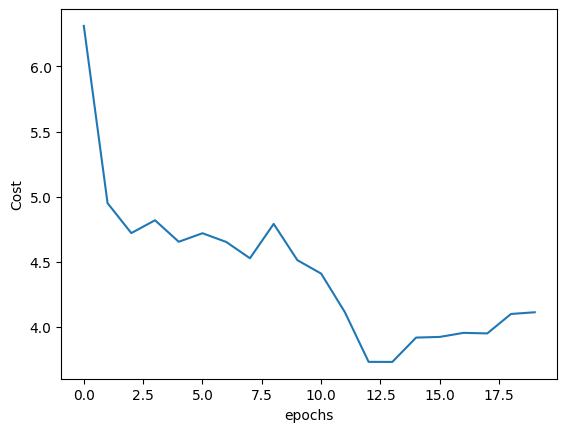

In [146]:
plot(learning)

In [147]:
model.weights

[<tf.Variable 'dense_21/kernel:0' shape=(30, 10) dtype=float32, numpy=
 array([[ 1.40801835e+00, -3.60734296e+00,  2.45670056e+00,
          5.56950521e+00, -2.93762589e+00,  3.94180447e-01,
          3.63060069e+00, -2.70693398e+00,  1.80159196e-01,
          2.82259226e+00],
        [ 2.99164891e+00,  4.71874475e+00, -2.93666782e+01,
          9.18835759e-01, -3.48220062e+00, -2.78544998e+00,
          3.73842216e+00, -1.93216789e+00, -7.99177504e+00,
          3.25719500e+00],
        [ 3.07969785e+00,  8.82355499e+00, -2.58702793e+01,
         -2.22720966e+01,  9.63466465e-01, -3.08495140e+00,
          1.49511528e+00, -6.62602186e+00, -8.97949505e+00,
          4.45543957e+00],
        [ 2.17981339e+00, -2.24915504e+00, -2.68471794e+01,
         -1.39608850e+01, -4.91615534e+00, -2.72514296e+00,
          2.58578944e+00, -4.02862310e+00, -1.09484177e+01,
          4.02823019e+00],
        [ 1.27398193e+00,  2.77555180e+00, -2.72834167e+01,
         -2.39396739e+00,  4.19996709e-01

In [148]:
import joblib

joblib.dump(model,"model2.pkl")

['model2.pkl']

In [149]:
#loading
p_model=joblib.load("model2.pkl")

In [150]:
p_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                310       
                                                                 
 dense_22 (Dense)            (None, 20)                220       
                                                                 
 dense_23 (Dense)            (None, 1)                 21        
                                                                 
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [151]:
p_model.predict(X_test)

197/197 [==============================] - 0s 1ms/step


array([[29.397053],
       [42.779682],
       [59.589966],
       ...,
       [59.73877 ],
       [45.601734],
       [41.39588 ]], dtype=float32)

In [152]:
X_test.head()

,age,sex_1.0,sex_2.0,rural_1,rural_2,disability_status_1.0,disability_status_2.0,disability_status_3.0,disability_status_4.0,disability_status_5.0,...,chew_7.0,smoke_0.0,smoke_1.0,smoke_2.0,smoke_3.0,smoke_4.0,alcohol_0.0,alcohol_1.0,alcohol_2.0,alcohol_3.0
20762,32.0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
21484,41.0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9865,58.0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
18947,24.0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
24667,21.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [153]:
jsonfile=model.to_json()
with open ("model.json","w") as f:
  f.write(jsonfile)

model.save_weights("model.h5")

In [154]:
y_test

20762    32.0
21484    41.0
9865     58.0
18947    24.0
24667    21.0
         ... 
5470     24.0
1596     38.0
18804    62.0
13861    51.0
11589    38.0
Name: age, Length: 6294, dtype: float64